In [25]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import model_predict
import pickle
import sys, itertools

In [26]:
series, scaler = model_predict.read_data_series(scale=True, filter_early=True, file_index=2)

时间序列不连贯，缺失的月份： ['2013-11', '2014-12', '2015-04', '2017-12']
即将填充缺失的月份
月份平均：
月份
1     165.417333
2     107.969333
3      95.301778
4     123.181000
5     154.631111
6     202.507111
7     136.807500
8     117.749000
9     157.433000
10    156.723500
11    156.563429
12    136.816000
Name: 销量（箱）, dtype: float64


In [27]:
results = pickle.load(open('results.pkl', 'rb'))

results.sort(key=lambda x: x[2])
print('Best:', results[1])

Best: ((2, 0, 1), (0, 0, 0, 0), 81.04484381745485)


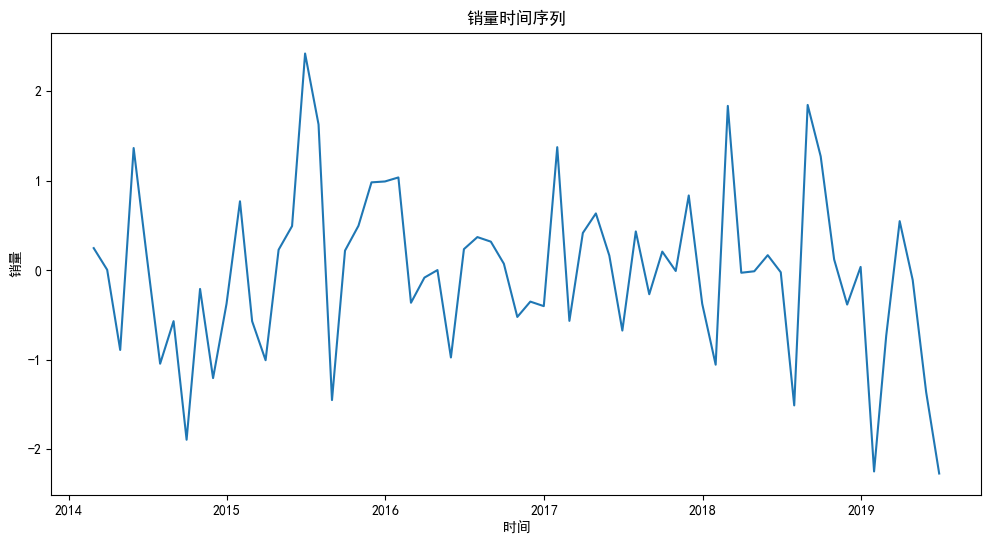

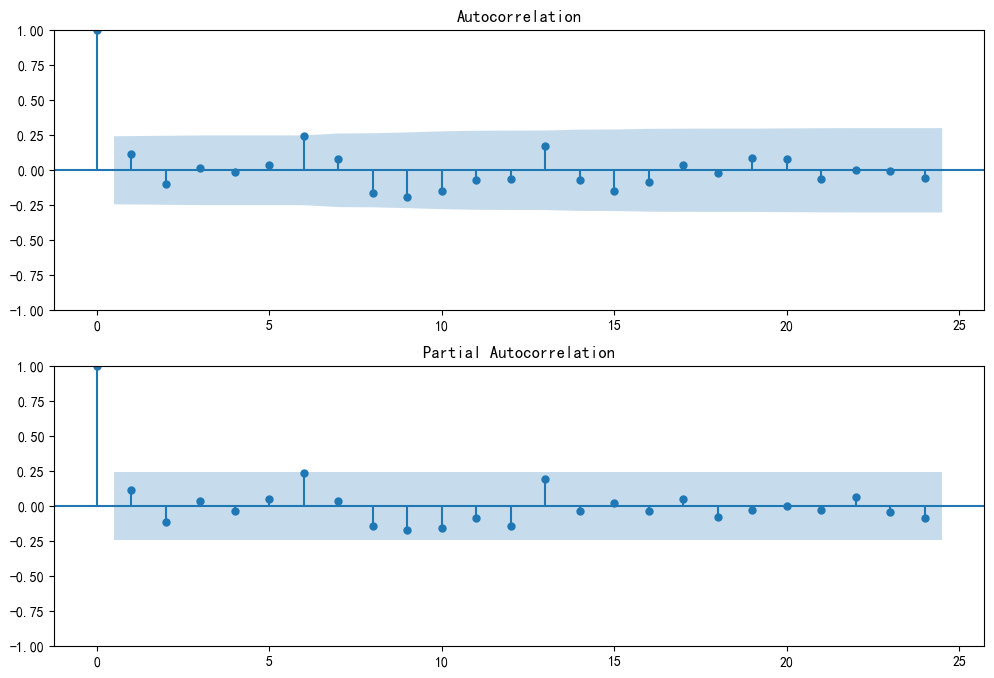

In [28]:
model_predict.plot_series_info(series)

In [42]:
# 拟合 SARIMA 模型
# order = param_best  # AR 阶数为 1，差分阶数为 0，MA 阶数为 1
order = (2, 0, 1)
seasonal_order = (1, 0, 1, 6)  # 季节性部分：季节 AR 阶数为 1，差分阶数为 0，季节 MA 阶数为 1，季节周期为 12 (假设数据是按月季节性的)
model = SARIMAX(series, order=order, seasonal_order=seasonal_order)  # 创建 SARIMA 模型对象
results = model.fit()  # 拟合模型，估计模型参数

# 输出模型拟合结果
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   65
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 6)   Log Likelihood                 -80.512
Date:                           Tue, 30 Jul 2024   AIC                            173.023
Time:                                   04:05:51   BIC                            186.069
Sample:                               02-28-2014   HQIC                           178.171
                                    - 06-30-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8247      0.146     -5.668      0.000      -1.110      -0.540
ar.L2          0.0255      0.154      0.165

C:\Users\h1318\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 5404.03
MAE: 59.83
R^2: 0.27
MAPE: 1.99


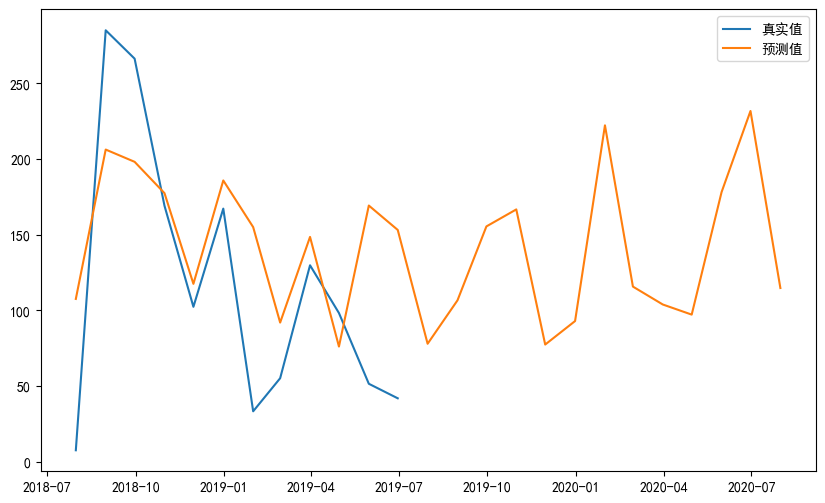

2018-07-31    107.534999
2018-08-31    206.297393
2018-09-30    198.186161
2018-10-31    177.461105
2018-11-30    117.505275
2018-12-31    185.865000
2019-01-31    155.024032
2019-02-28     91.896719
2019-03-31    148.536377
2019-04-30     76.045178
2019-05-31    169.280989
2019-06-30    153.148837
2019-07-31     77.893231
2019-08-31    106.605153
2019-09-30    155.476143
2019-10-31    166.716272
2019-11-30     77.368000
2019-12-31     92.903298
2020-01-31    222.302972
2020-02-29    115.689744
2020-03-31    103.853363
2020-04-30     97.160632
2020-05-31    178.169758
2020-06-30    231.800585
2020-07-31    114.756043
Freq: M, dtype: float64

In [43]:
model_predict.predict_to_future_arima(results, series, scaler, last_months=12)